# Runtime comparisson: Classical vs. Quantum

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Define initial search space

In [3]:
lower_bound = 20
upper_bound = 1000000
n_range = [i for i in range(lower_bound, upper_bound)]

## Define Functions

In [4]:
# Define operarions
class RunVis:
    def __init__(self,runtimes,n_range):
        self.runtimes = runtimes
        self.outputs = {}
        self.algo_max = 0
        for category in self.runtimes:
            for algorithm in self.runtimes[category]:
                label = category + ":" + algorithm
                self.outputs[label] = self.runtimes[category][algorithm](n_range)
                self.algo_max += 1
    
    @staticmethod            
    def do_shor_log(n_range):
        return [math.log10((math.log10(math.pow(n,3)))) for n in n_range]
   
    @staticmethod
    def do_fermat_log(n_range):
        return [math.log10((math.pow(n,1/3) * math.log10(math.log10(n)))) for n in n_range]
    
    @staticmethod
    def do_grover_log(n_range):
        return [(math.log10(math.sqrt(n))) for n in n_range]
    
    @staticmethod
    def do_bubblesort_log(n_range):
        return [math.log10((n**2)) for n in n_range]
    
    @staticmethod
    def do_quicksort_log(n_range):
        return [math.log10((n*math.log10(n))) for n in n_range]
    
    @staticmethod            
    def do_shor(n_range):
        return [(math.log10(math.pow(n,3))) for n in n_range]
   
    @staticmethod
    def do_fermat(n_range):
        return [(math.pow(n,1/3) * math.log10(math.log10(n))) for n in n_range]
    
    @staticmethod
    def do_grover(n_range):
        return [(math.sqrt(n)) for n in n_range]
    
    @staticmethod
    def do_bubblesort(n_range):
        return [(n**2) for n in n_range]
    
    @staticmethod
    def do_quicksort(n_range):
        return [(n*math.log10(n)) for n in n_range]
    
    def draw(self):
        for category in self.runtimes:
            for algorithm in self.runtimes[category]:
                label = category + ":" + algorithm
                plt.plot(self.outputs[label], label=label)
                plt.legend()
                
    def boundsearch(self,diff,thres):
        dec = []
        for d in diff:
            if d < thres and d > -thres:
                dec.append(1)
            else:
                dec.append(0)

        dist = []
        index = 0
        for d in dec:
            if d == 1:
                dist.append(index)
            index+=1

        lower_bound = dist[0]+20
        upper_bound = dist[-1] 
        return (lower_bound, upper_bound)
            
    def calc_diff(self):
        last = [0]
        for o in self.outputs:
            diff = np.abs(np.array(last) - np.array(self.outputs[o]))
            last = np.array(self.outputs[o])
        return diff

## Without preprocessing

In [5]:
runtimes = {
        "quantum": {"SHOR":RunVis.do_shor, 
                    "GROVER":RunVis.do_grover},
        "classical": {"FERMAT_LEHMAN":RunVis.do_fermat, 
                      "BUBBLESORT":RunVis.do_bubblesort,
                      "QUICKSORT":RunVis.do_quicksort}
                     
}

array([  3.73979400e+02,   4.13233395e+02,   4.54466701e+02, ...,
         9.99988000e+11,   9.99990000e+11,   9.99992000e+11])

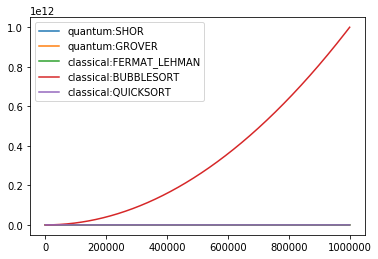

In [6]:
runvis = RunVis(runtimes, n_range)
runvis.draw()
runvis.calc_diff()

## Use Y-axis in log space

In [7]:
runtimes = {
        "quantum": {"SHOR_LOG":RunVis.do_shor_log, 
                    "GROVER_LOG":RunVis.do_grover_log},
        "classical": {"FERMAT_LEHMAN_LOG":RunVis.do_fermat_log, 
                      "BUBBLESORT_LOG":RunVis.do_bubblesort_log,
                      "QUICKSORT_LOG":RunVis.do_quicksort_log}
                     
}

array([ 1.18674269,  1.2009158 ,  1.2145334 , ...,  5.22184754,
        5.22184794,  5.22184835])

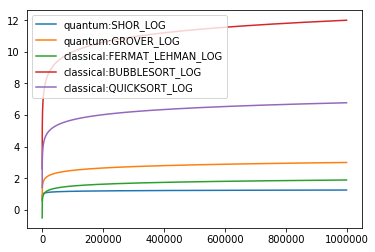

In [8]:
runvis = RunVis(runtimes, n_range)
runvis.draw()
runvis.calc_diff()

## Zoom by difference mean * 0.8

Threshold (difference.std/number_of_algorithms): 3.85742147555


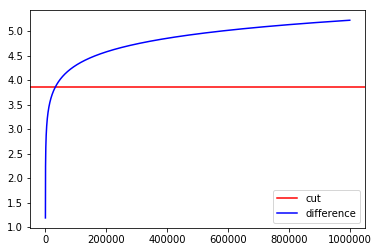

In [9]:
diff = runvis.calc_diff()
thres = diff.mean()*0.8
print("Threshold (difference.std/number_of_algorithms): " + str(thres))
plt.axhline(thres, label='cut',color = 'red')
plt.plot(diff, label="difference", color='blue')
plt.legend()

(20, 32471)


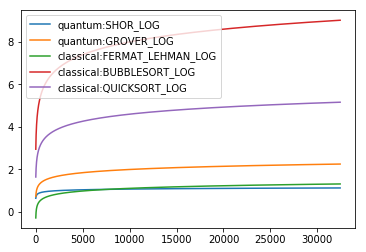

In [10]:
limits = runvis.boundsearch(diff,thres)
print(limits)
n_range2 = [i for i in range(limits[0]+10,limits[1])]
runvis2 = RunVis(runtimes, n_range2)
runvis2.draw()

## Zoom by difference mean * std

Threshold (difference.std/number_of_algorithms): 1.91176421853


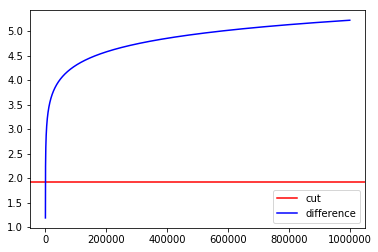

In [11]:
diff = runvis.calc_diff()
thres = diff.mean() * diff.std()
print("Threshold (difference.std/number_of_algorithms): " + str(thres))
plt.axhline(thres, label='cut',color = 'red')
plt.plot(diff, label="difference", color='blue')
plt.legend()

(20, 165)


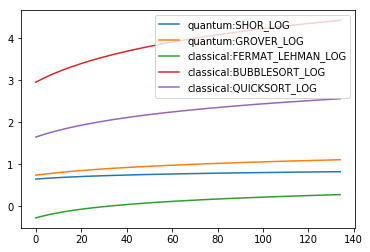

In [12]:
limits = runvis.boundsearch(diff,thres)
print(limits)
n_range2 = [i for i in range(limits[0]+10,limits[1])]
runvis2 = RunVis(runtimes, n_range2)
runvis2.draw()